##  FCI Simulated Images and  Image Denoising 
#### Code written by Doroteya Stoyanova

## 1. What is our data ?
Our dataset comprises simulated FCI (Field-Cycling Imaging) scans formatted as 2D multichannel images with dimensions HxWxExM (height, width, evolution time (5), and magnetic field (3)). Each scan can be viewed as a 3D volume by treating height and width as spatial dimensions, while merging the evolution time and magnetic field into a single channel dimension, resulting in 15 channels.

We use two methods to interpret the data:

   * Flat Multichannel Approach (90x90x15): Combines evolution time and magnetic field into one dimension, simplifying the data structure at the cost of possibly losing detailed interactions between the two dimensions.

   * Separate Dimensions Approach (90x90x5x3): Keeps evolution time and magnetic field as distinct dimensions in a 4D volume, preserving detailed interactions and enabling more nuanced analysis.


   

In [2]:

from os.path import dirname, join as pjoin

import scipy.io 
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# dimension of our data 
mat = scipy.io.loadmat('/Users/dolorious/Downloads/simulation-1/GroundTruth.mat')
image_data = mat['data']

image_data.shape

mat.items()
mat["data"] 

array([[[[0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972]],

        [[0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972]],

        [[0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972]],

        ...,

        [[0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972],
         [0.49768972, 0.49768972, 0.49768972]],

        [[0.49768972, 0.49768972, 0.49

# Ground truth image visualise : 



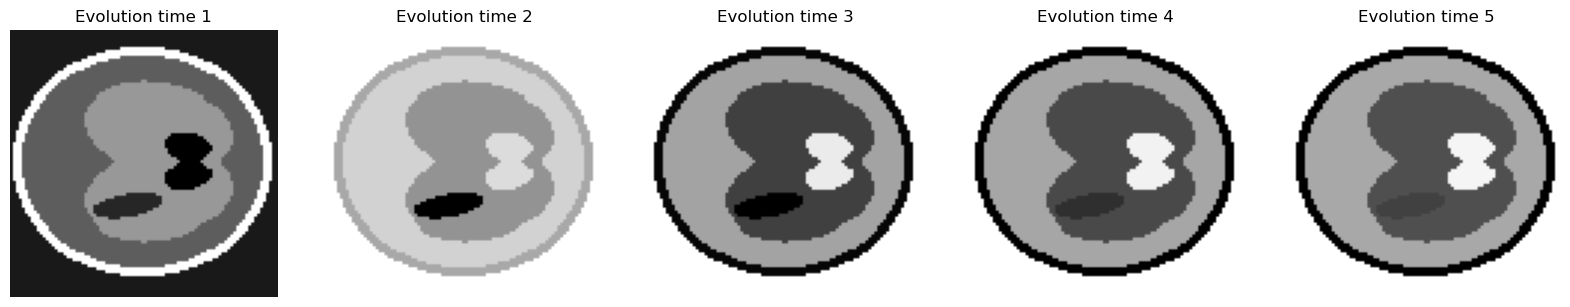

In [5]:
from skimage.color import rgb2gray

plt.figure(figsize=(20, 4))  
evol_time = image_data.shape[2]  

for i in range(evol_time):
  
    rgb_image = image_data[:, :, i, :] 

    # Convert RGB image to grayscale.
    grayscale_image = rgb2gray(rgb_image)

    
    plt.subplot(1, evol_time, i+1) 
    plt.imshow(grayscale_image, cmap='gray')  # Display grayscale image
    plt.title(f'Evolution time {i+1}')
    plt.axis('off')  

plt.show()